In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
drug_df = pd.read_csv("drug200.csv") #Load the dataset

In [4]:
drug_df.shape

(200, 6)

In [5]:
drug_df.isnull().sum() #to shows null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
drug_df.head() #to show the 5 first rows

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
#shows the unique in each colmuns
for col in drug_df:
    print(col)
    print(drug_df [col].unique())

Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
Sex
['F' 'M']
BP
['HIGH' 'LOW' 'NORMAL']
Cholesterol
['HIGH' 'NORMAL']
Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.2

In [8]:
le = LabelEncoder() #init Label Encoder
drug_df['Sex'] =le.fit_transform(drug_df['Sex']) #Encode Sex columns
drug_df['BP']=le.fit_transform(drug_df['BP']) #Encode BP columns
drug_df['Cholesterol']=le.fit_transform(drug_df['Cholesterol']) #Encode Cholesterol columns
drug_df['Drug']=le.fit_transform(drug_df['Drug']) #Encode Drug columns

In [9]:
drug_df.corr() # #Compute pairwise correlation of columns

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


In [10]:
#split the data and choose feature colmns
X_train , X_test , y_train , y_test = train_test_split(drug_df[['BP' , 'Na_to_K','Cholesterol']], drug_df.iloc[:,-1], train_size=.80 , random_state=42 ) 

In [11]:
sc = StandardScaler() #init Standard Scaler

X_train = sc.fit_transform(X_train) #scale X_train by fit_transform
X_test = sc.transform(X_test) #scale X_test by fit_transform

In [12]:
lr_model = LogisticRegression() #init Logistic Regression
lr_model.fit(X_train , y_train) #fit training set
y_pred = lr_model.predict(X_test) #predict

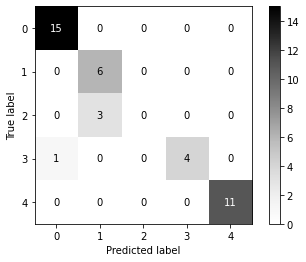

In [13]:
plot_confusion_matrix(lr_model, X=X_test, y_true=y_test, cmap='Greys')

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.72      0.76      0.73        40
weighted avg       0.85      0.90      0.87        40

